In [2]:
import os

# Set the main project folder path
project_path = r"C:\Users\Aarav computer\fraud_project"
data_path = os.path.join(project_path, "data")

print("PROJECT PATH:", project_path)
print("DATA PATH:", data_path)
print("FILES:", os.listdir(data_path))

PROJECT PATH: C:\Users\Aarav computer\fraud_project
DATA PATH: C:\Users\Aarav computer\fraud_project\data
FILES: ['Banking_Transactions_USA_2023_2024.csv', 'bank_transactions_data_2.csv', 'customers.csv', 'final_transaction_top.csv', 'location_data.csv', 'sample_101_synthetic_fraud_dataset.csv', 'transactions_1.csv', 'transactions_2.csv']


In [3]:
import pandas as pd

bank1 = pd.read_csv(data_path + r"/bank_transactions_data_2.csv")
bank2 = pd.read_csv(data_path + r"/Banking_Transactions_USA_2023_2024.csv")
cust   = pd.read_csv(data_path + r"/customers.csv")
loc    = pd.read_csv(data_path + r"/location_data.csv")
syn    = pd.read_csv(data_path + r"/sample_101_synthetic_fraud_dataset.csv")
t1     = pd.read_csv(data_path + r"/transactions_1.csv")
t2     = pd.read_csv(data_path + r"/transactions_2.csv")
final  = pd.read_csv(data_path + r"/final_transaction_top.csv")

C:\Users\Aarav computer\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\Aarav computer\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:61: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [4]:
print("bank1:", bank1.shape)
print("bank2:", bank2.shape)
print("cust:", cust.shape)
print("loc:", loc.shape)
print("syn:", syn.shape)
print("t1:", t1.shape)
print("t2:", t2.shape)
print("final:", final.shape)

bank1: (2512, 16)
bank2: (5389, 20)
cust: (5389, 20)
loc: (1494, 9)
syn: (100, 21)
t1: (200000, 24)
t2: (100, 21)
final: (11100, 7)


In [4]:
dfs = {
    "bank1": bank1,
    "bank2": bank2,
    "cust": cust,
    "loc": loc,
    "syn": syn,
    "t1": t1,
    "t2": t2,
    "final": final
}

for name, df in dfs.items():
    print("\n----", name, "----")
    print([col for col in df.columns if "date" in col.lower() or "time" in col.lower() or "timestamp" in col.lower()])


---- bank1 ----
['TransactionDate', 'PreviousTransactionDate']

---- bank2 ----
['Transaction_Date']

---- cust ----
['Transaction_Date']

---- loc ----
[]

---- syn ----
['Timestamp']

---- t1 ----
['Transaction_Date', 'Transaction_Time']

---- t2 ----
['Timestamp']

---- final ----
[]


In [5]:
import pandas as pd

# 1) Create copy before merge
bank1_c = bank1.copy()
bank2_c = bank2.copy()
cust_c = cust.copy()
loc_c = loc.copy()
syn_c = syn.copy()
t1_c = t1.copy()
t2_c = t2.copy()
final_c = final.copy()

# 2) UNIFY date column name → 'timestamp'

# ---- bank1 ----
if 'TransactionDate' in bank1_c.columns:
    bank1_c['timestamp'] = pd.to_datetime(bank1_c['TransactionDate'], errors='coerce')

# ---- bank2 ----
if 'Transaction_Date' in bank2_c.columns:
    bank2_c['timestamp'] = pd.to_datetime(bank2_c['Transaction_Date'], errors='coerce')

# ---- cust ----
if 'Transaction_Date' in cust_c.columns:
    cust_c['timestamp'] = pd.to_datetime(cust_c['Transaction_Date'], errors='coerce')

# ---- syn ----
if 'Timestamp' in syn_c.columns:
    syn_c['timestamp'] = pd.to_datetime(syn_c['Timestamp'], errors='coerce')

# ---- t1 ----
if 'Transaction_Date' in t1_c.columns:
    if 'Transaction_Time' in t1_c.columns:
        t1_c['timestamp'] = pd.to_datetime(t1_c['Transaction_Date'] + " " + t1_c['Transaction_Time'], errors='coerce')
    else:
        t1_c['timestamp'] = pd.to_datetime(t1_c['Transaction_Date'], errors='coerce')

# ---- t2 ----
if 'Timestamp' in t2_c.columns:
    t2_c['timestamp'] = pd.to_datetime(t2_c['Timestamp'], errors='coerce')

# ---- final ---- (NO date)
# --> skip

# 3) Print results
print("bank1:", bank1_c['timestamp'].notna().sum())
print("bank2:", bank2_c['timestamp'].notna().sum())
print("cust:", cust_c['timestamp'].notna().sum())
print("syn:", syn_c['timestamp'].notna().sum())
print("t1:", t1_c['timestamp'].notna().sum())
print("t2:", t2_c['timestamp'].notna().sum())


bank1: 2512
bank2: 5389
cust: 2171
syn: 100
t1: 200000
t2: 100


C:\Users\Aarav computer\AppData\Local\Temp\ipykernel_7936\837284373.py:34: UserWarning: Parsing dates in %d-%m-%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  t1_c['timestamp'] = pd.to_datetime(t1_c['Transaction_Date'] + " " + t1_c['Transaction_Time'], errors='coerce')
C:\Users\Aarav computer\AppData\Local\Temp\ipykernel_7936\837284373.py:40: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  t2_c['timestamp'] = pd.to_datetime(t2_c['Timestamp'], errors='coerce')


In [6]:
print("---- bank1 ----")
print(bank1.columns.tolist())

print("\n---- bank2 ----")
print(bank2.columns.tolist())

print("\n---- cust ----")
print(cust.columns.tolist())

print("\n---- loc ----")
print(loc.columns.tolist())

print("\n---- syn ----")
print(syn.columns.tolist())

print("\n---- t1 ----")
print(t1.columns.tolist())

print("\n---- t2 ----")
print(t2.columns.tolist())

---- bank1 ----
['TransactionID', 'AccountID', 'TransactionAmount', 'TransactionDate', 'TransactionType', 'Location', 'DeviceID', 'IP Address', 'MerchantID', 'Channel', 'CustomerAge', 'CustomerOccupation', 'TransactionDuration', 'LoginAttempts', 'AccountBalance', 'PreviousTransactionDate']

---- bank2 ----
['Transaction_ID', 'Account_Number', 'Transaction_Date', 'Transaction_Amount', 'Merchant_Name', 'Transaction_Type', 'Category', 'City', 'Country', 'Payment_Method', 'Customer_Age', 'Customer_Gender', 'Customer_Occupation', 'Customer_Income', 'Account_Balance', 'Transaction_Status', 'Fraud_Flag', 'Discount_Applied', 'Loyalty_Points_Earned', 'Transaction_Description']

---- cust ----
['Transaction_ID', 'Account_Number', 'Transaction_Date', 'Transaction_Amount', 'Merchant_Name', 'Transaction_Type', 'Category', 'City', 'Country', 'Payment_Method', 'Customer_Age', 'Customer_Gender', 'Customer_Occupation', 'Customer_Income', 'Account_Balance', 'Transaction_Status', 'Fraud_Flag', 'Discount_

In [6]:
import pandas as pd

# ------------------------
# 1. BANK1 MAPPING
# ------------------------
b1 = pd.DataFrame()
b1["customer_id"] = bank1["AccountID"]
b1["amount"] = bank1["TransactionAmount"]
b1["merchant_id"] = bank1["MerchantID"]
b1["state"] = bank1["Location"]

b1["timestamp"] = pd.to_datetime(bank1["TransactionDate"], errors='coerce')


# ------------------------
# 2. BANK2 MAPPING
# ------------------------
b2 = pd.DataFrame()
b2["customer_id"] = bank2["Account_Number"]
b2["amount"] = bank2["Transaction_Amount"]
b2["merchant_id"] = bank2["Merchant_Name"]
b2["state"] = bank2["City"]   # no state → use city

b2["timestamp"] = pd.to_datetime(bank2["Transaction_Date"], errors='coerce')


# ------------------------
# 3. CUST DATASET (same as bank2)
# ------------------------
cst = pd.DataFrame()
cst["customer_id"] = cust["Account_Number"]
cst["amount"] = cust["Transaction_Amount"]
cst["merchant_id"] = cust["Merchant_Name"]
cst["state"] = cust["City"]

cst["timestamp"] = pd.to_datetime(cust["Transaction_Date"], errors='coerce')


# ------------------------
# 4. SYNTHETIC DATA
# ------------------------
syn2 = pd.DataFrame()
syn2["customer_id"] = syn["User_ID"]
syn2["amount"] = syn["Transaction_Amount"]
syn2["merchant_id"] = syn["Merchant_Category"]
syn2["state"] = syn["Location"]

syn2["timestamp"] = pd.to_datetime(syn["Timestamp"], errors='coerce')


# ------------------------
# 5. T1 DATASET (VERY BIG 200,000 ROWS)
# ------------------------
t1b = pd.DataFrame()
t1b["customer_id"] = t1["Customer_ID"]
t1b["amount"] = t1["Transaction_Amount"]
t1b["merchant_id"] = t1["Merchant_ID"]
t1b["state"] = t1["State"]

t1b["timestamp"] = pd.to_datetime(t1["Transaction_Date"] + " " + t1["Transaction_Time"], errors='coerce')


# ------------------------
# 6. T2 DATASET
# ------------------------
t2b = pd.DataFrame()
t2b["customer_id"] = t2["User_ID"]
t2b["amount"] = t2["Transaction_Amount"]
t2b["merchant_id"] = t2["Merchant_Category"]
t2b["state"] = t2["Location"]

t2b["timestamp"] = pd.to_datetime(t2["Timestamp"], errors='coerce')


# ------------------------
# 7. FINAL TRANSACTION TOP
# ------------------------
# First check columns:
print(final.columns)

# If contains: ["Transaction_ID","Customer_ID","Amount","State","Merchant_ID","Timestamp"]
final2 = pd.DataFrame()
final2["customer_id"] = final["Customer_ID"] if "Customer_ID" in final.columns else None
final2["amount"] = final["Amount"] if "Amount" in final.columns else None
final2["merchant_id"] = final["Merchant_ID"] if "Merchant_ID" in final.columns else None
final2["state"] = final["State"] if "State" in final.columns else None
final2["timestamp"] = pd.to_datetime(final["Timestamp"], errors='coerce') if "Timestamp" in final.columns else None


# ------------------------
# MERGE ALL DATASETS INTO ONE
# ------------------------
master = pd.concat([b1, b2, cst, syn2, t1b, t2b, final2], ignore_index=True)

# Drop rows with no timestamp
master = master.dropna(subset=["timestamp"])

# Sort by time
master = master.sort_values("timestamp").reset_index(drop=True)

print("MASTER SHAPE:", master.shape)
master.head()


C:\Users\Aarav computer\AppData\Local\Temp\ipykernel_7936\3029653432.py:60: UserWarning: Parsing dates in %d-%m-%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  t1b["timestamp"] = pd.to_datetime(t1["Transaction_Date"] + " " + t1["Transaction_Time"], errors='coerce')
C:\Users\Aarav computer\AppData\Local\Temp\ipykernel_7936\3029653432.py:72: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  t2b["timestamp"] = pd.to_datetime(t2["Timestamp"], errors='coerce')
C:\Users\Aarav computer\AppData\Local\Temp\ipykernel_7936\3029653432.py:93: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant 

Index(['Unnamed: 0', 'entityName', 'state', 'year', 'quarter', 'count',
       'amount'],
      dtype='object')
MASTER SHAPE: (210272, 5)


,customer_id,amount,merchant_id,state,timestamp
0,TTGG57024093986639,1668.54,Kelly LLC,San Antonio,2023-01-02 03:01:00
1,JZKR38521495795767,3937.70,Taylor Inc,Chicago,2023-01-02 03:36:00
2,XYRS89112814714384,1579.20,Hamilton-Hernandez,Phoenix,2023-01-02 05:31:00
3,UZYD82070669010792,223.02,Lee-Miller,Los Angeles,2023-01-02 06:06:00
4,UUDW69435328617805,1426.39,"Gonzalez, Lawson and Espinoza",Phoenix,2023-01-02 14:09:00


In [11]:
df = master.copy()

# Clean
df = df.dropna(subset=["customer_id", "amount", "timestamp"])
df = df.sort_values(["customer_id", "timestamp"])

# Basic time features
df["hour"] = df["timestamp"].dt.hour
df["weekday"] = df["timestamp"].dt.weekday
df["is_weekend"] = df["weekday"].isin([5,6]).astype(int)

print("STEP-6 BASIC FEATURES OK")
df.head()

STEP-6 BASIC FEATURES OK


,customer_id,amount,merchant_id,state,timestamp,hour,weekday,is_weekend
36254,00000d7b-73b6-432c-a706-62447bc30275,98378.26,95c62daf-67d8-4e0e-8035-ac9fd6107497,Karnataka,2025-01-04 21:42:07,21,5,1
84613,00009fec-323d-4d5d-8919-25be9fb648bd,23466.43,76cb4243-4f8a-492f-a12c-1a7d48c086e5,Bihar,2025-01-12 04:15:36,4,6,1
17737,000122d9-0442-44a7-9c6a-ec6d8a7135a5,70357.11,d939c8a5-ef40-469c-885c-48b0c0cd3c50,Delhi,2025-01-02 03:33:19,3,3,0
208838,00014b31-64db-4fa5-af94-96c6c80f6a80,65838.99,cbf1fac9-3d7e-4320-9938-7111a96855ab,West Bengal,2025-01-30 19:07:40,19,3,0
184456,0001ff91-234e-497a-bd2d-c650c14b8d13,86337.62,d7d49257-d451-4d23-8448-b7aa11796b80,Tripura,2025-01-27 03:58:44,3,0,0


In [7]:
df.shape
df.columns

Index(['Unnamed: 0', 'entityName', 'state', 'year', 'quarter', 'count',
       'amount'],
      dtype='object')

In [8]:
import psutil, time

for i in range(10):
    print("CPU:", psutil.cpu_percent(), "%    RAM:", psutil.virtual_memory().percent, "%")
    time.sleep(1)


CPU: 20.2 %    RAM: 38.7 %
CPU: 2.7 %    RAM: 38.8 %
CPU: 4.3 %    RAM: 38.8 %
CPU: 5.1 %    RAM: 38.8 %
CPU: 2.9 %    RAM: 38.8 %
CPU: 1.7 %    RAM: 38.7 %
CPU: 8.3 %    RAM: 38.7 %
CPU: 1.9 %    RAM: 38.7 %
CPU: 9.6 %    RAM: 38.7 %
CPU: 5.5 %    RAM: 38.7 %


In [12]:
print("DF SHAPE =", df.shape)
print(df.head())
print(df.columns)


DF SHAPE = (11100, 7)
   Unnamed: 0                entityName                      state  year  \
0           0             south andaman  andaman-&-nicobar-islands  2018   
1           1                  nicobars  andaman-&-nicobar-islands  2018   
2           2  north and middle andaman  andaman-&-nicobar-islands  2018   
3           3                    744101  andaman-&-nicobar-islands  2018   
4           4                    744103  andaman-&-nicobar-islands  2018   

   quarter  count        amount  
0        1   5688  1.256025e+07  
1        1    528  1.139849e+06  
2        1    442  9.316631e+05  
3        1   1622  2.769298e+06  
4        1   1223  2.238042e+06  
Index(['Unnamed: 0', 'entityName', 'state', 'year', 'quarter', 'count',
       'amount'],
      dtype='object')


In [15]:
df.columns
df.head()


,Unnamed: 0,entityName,state,year,quarter,count,amount
0,0,south andaman,andaman-&-nicobar-islands,2018,1,5688,1.256025e+07
1,1,nicobars,andaman-&-nicobar-islands,2018,1,528,1.139849e+06
2,2,north and middle andaman,andaman-&-nicobar-islands,2018,1,442,9.316631e+05
3,3,744101,andaman-&-nicobar-islands,2018,1,1622,2.769298e+06
4,4,744103,andaman-&-nicobar-islands,2018,1,1223,2.238042e+06


In [17]:
import os

path = r"C:\Users\Aarav computer\fraud_project\data"
print(os.listdir(path))



['Banking_Transactions_USA_2023_2024.csv', 'bank_transactions_data_2.csv', 'customers.csv', 'final_transaction_top.csv', 'location_data.csv', 'sample_101_synthetic_fraud_dataset.csv', 'transactions_1.csv', 'transactions_2.csv']


In [18]:
import pandas as pd
import numpy as np

path = r"C:\Users\Aarav computer\fraud_project\data"

# Load all files
df_main = pd.read_csv(f"{path}/Banking_Transactions_USA_2023_2024.csv")
df_bank2 = pd.read_csv(f"{path}/bank_transactions_data_2.csv")
df_cust = pd.read_csv(f"{path}/customers.csv")
df_top = pd.read_csv(f"{path}/final_transaction_top.csv")
df_loc = pd.read_csv(f"{path}/location_data.csv")
df_syn = pd.read_csv(f"{path}/sample_101_synthetic_fraud_dataset.csv")
df_t1 = pd.read_csv(f"{path}/transactions_1.csv")
df_t2 = pd.read_csv(f"{path}/transactions_2.csv")

print("✔ All files loaded successfully")

# Standardize column names (remove spaces / uppercase)
def clean_cols(df):
    df.columns = df.columns.str.lower().str.strip().str.replace(" ", "_")
    return df

df_main = clean_cols(df_main)
df_bank2 = clean_cols(df_bank2)
df_cust = clean_cols(df_cust)
df_top = clean_cols(df_top)
df_loc = clean_cols(df_loc)
df_syn = clean_cols(df_syn)
df_t1 = clean_cols(df_t1)
df_t2 = clean_cols(df_t2)

print("✔ Column names cleaned")

# Combine main transaction datasets
transactions = pd.concat([df_main, df_bank2, df_t1, df_t2], ignore_index=True)

print("✔ All transaction datasets merged")

# Check important columns — create if missing
required_cols = ["transaction_id", "customer_id", "amount", "timestamp"]

for col in required_cols:
    if col not in transactions.columns:
        transactions[col] = np.nan
        print(f"⚠ Missing column created: {col}")

# Convert timestamp to datetime safely
if "timestamp" in transactions.columns:
    transactions["timestamp"] = pd.to_datetime(transactions["timestamp"], errors="coerce")

print("✔ Timestamp column processed")

# Remove duplicates + clean NA
transactions.drop_duplicates(inplace=True)
transactions = transactions.dropna(subset=["customer_id"], how="any")

print("✔ Duplicates removed + NA fixed")

# Merge customer data
if "customer_id" in df_cust.columns:
    transactions = transactions.merge(df_cust, on="customer_id", how="left")
    print("✔ Customer info merged")

# Merge location data (optional)
if "location_id" in transactions.columns and "location_id" in df_loc.columns:
    transactions = transactions.merge(df_loc, on="location_id", how="left")
    print("✔ Location data merged")

# Final cleaned dataset ready
print("\n🎉 Final Clean Data Ready — Rows:", len(transactions))
transactions.head()


✔ All files loaded successfully
✔ Column names cleaned
✔ All transaction datasets merged
⚠ Missing column created: amount


C:\Users\Aarav computer\AppData\Local\Temp\ipykernel_7936\2520561491.py:49: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  transactions["timestamp"] = pd.to_datetime(transactions["timestamp"], errors="coerce")


✔ Timestamp column processed
✔ Duplicates removed + NA fixed

🎉 Final Clean Data Ready — Rows: 200000


,transaction_id,account_number,transaction_date,transaction_amount,merchant_name,transaction_type,category,city,country,payment_method,...,avg_transaction_amount_7d,failed_transaction_count_7d,card_type,card_age,transaction_distance,authentication_method,risk_score,is_weekend,fraud_label,amount
7901,4fa3208f-9e23-42dc-b330-844829d0c12c,NaN,23-01-2025,32415.45,NaN,Transfer,NaN,Thiruvananthapuram,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7902,c9de0c06-2c4c-40a9-97ed-3c7b8f97c79c,NaN,11-01-2025,43622.60,NaN,Bill Payment,NaN,Nashik,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7903,e41c55f9-c016-4ff3-872b-cae72467c75c,NaN,25-01-2025,63062.56,NaN,Bill Payment,NaN,Bhagalpur,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7904,7f7ee11b-ff2c-45a3-802a-49bc47c02ecb,NaN,19-01-2025,14000.72,NaN,Debit,NaN,Chennai,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7905,f8e6ac6f-81a1-4985-bf12-f60967d852ef,NaN,30-01-2025,18335.16,NaN,Transfer,NaN,Amritsar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
import pandas as pd

# Load final dataset freshly
final_df = pd.read_csv(data_path + "/final_transaction_top.csv")

print("Final dataset shape:", final_df.shape)
final_df.head()


Final dataset shape: (11100, 7)


,Unnamed: 0,entityName,state,year,quarter,count,amount
0,0,south andaman,andaman-&-nicobar-islands,2018,1,5688,1.256025e+07
1,1,nicobars,andaman-&-nicobar-islands,2018,1,528,1.139849e+06
2,2,north and middle andaman,andaman-&-nicobar-islands,2018,1,442,9.316631e+05
3,3,744101,andaman-&-nicobar-islands,2018,1,1622,2.769298e+06
4,4,744103,andaman-&-nicobar-islands,2018,1,1223,2.238042e+06


In [7]:
# Select numeric columns only
numeric_cols = final_df.select_dtypes(include=['int64','float64']).columns

print("Numeric columns used:")
print(numeric_cols)


Numeric columns used:
Index(['Unnamed: 0', 'year', 'quarter', 'count', 'amount'], dtype='object')


In [8]:
# Clean numeric dataset
clean_data = final_df[numeric_cols].fillna(0)


In [11]:
from sklearn.ensemble import IsolationForest

# Create model
iso = IsolationForest(
    contamination=0.03,  # 3% anomalies expected
    random_state=42
)

# Fit model
iso.fit(clean_data)

# Predict anomalies (1 = normal, -1 = anomaly)
final_df['anomaly_flag'] = iso.predict(clean_data)

# Convert to understandable labels
final_df['anomaly_flag'] = final_df['anomaly_flag'].map({1: "normal", -1: "anomaly"})


In [12]:
print(final_df['anomaly_flag'].value_counts())


anomaly_flag
normal     10767
anomaly      333
Name: count, dtype: int64


In [13]:
final_df.to_csv(data_path + "/final_with_anomalies.csv", index=False)
print("Anomaly file saved ✔")


Anomaly file saved ✔


In [21]:
print("✔ Step 9 started — ML Model Training...")

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

df_ml = df.copy()

# ------------------------------
# 1) Prepare fraud label
# ------------------------------
if "fraud_label" not in df_ml.columns or df_ml["fraud_label"].isna().all():
    print("⚠ fraud_label missing — creating synthetic labels...")
    
    # Synthetic rule-based fraud labels
    df_ml["fraud_label"] = (
        (df_ml["high_amount_flag"] == 1) |
        (df_ml["rapid_transaction_flag"] == 1) |
        (df_ml["velocity_flag"] == 1)
    ).astype(int)


# ------------------------------
# 2) Feature selection
# ------------------------------
features = [
    "amount",
    "hour",
    "day_of_week",
    "is_weekend",
    "high_amount_flag",
    "rapid_transaction_flag",
    "velocity_flag",
    "city_risk"
]

X = df_ml[features]
y = df_ml["fraud_label"]

# fix any nan
X = X.fillna(0)

# ------------------------------
# 3) Train/test split
# ------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

# ------------------------------
# 4) Train Model (RandomForest)
# ------------------------------
model = RandomForestClassifier(
    n_estimators=200,
    max_depth=12,
    random_state=42,
    class_weight="balanced"
)

model.fit(X_train, y_train)

# ------------------------------
# 5) Predictions
# ------------------------------
y_pred = model.predict(X_test)

print("\n🎯 Model Training Complete!")
print("\n📌 Classification Report:")
print(classification_report(y_test, y_pred))

print("\n📌 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

df_ml["predicted_fraud"] = model.predict(X)

print("\n✔ Step-9 finished: Predictions added to dataframe (df_ml)")
df_ml.head()


✔ Step 9 started — ML Model Training...
⚠ fraud_label missing — creating synthetic labels...

🎯 Model Training Complete!

📌 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     47500
           1       1.00      1.00      1.00      2500

    accuracy                           1.00     50000
   macro avg       1.00      1.00      1.00     50000
weighted avg       1.00      1.00      1.00     50000


📌 Confusion Matrix:
[[47500     0]
 [    0  2500]]

✔ Step-9 finished: Predictions added to dataframe (df_ml)


,transaction_id,account_number,transaction_date,transaction_amount,merchant_name,transaction_type,category,city,country,payment_method,...,is_online,is_transfer,city_risk,prev_time,time_diff_minutes,rapid_transaction_flag,amount_in_last_1hr,velocity_flag,fraud_score,predicted_fraud
8020,82da5b5f-69bc-42c7-ad62-51c48eafc404,NaN,2025-01-01,8410.71,NaN,Transfer,NaN,Chandigarh,NaN,NaN,...,0,1,0.959325,NaT,NaN,0,0,0,0.959325,0
8042,cc76fa6e-f4b6-4850-81ed-f94547ee8bba,NaN,2025-01-01,72149.81,NaN,Withdrawal,NaN,Pune,NaN,NaN,...,0,0,0.994280,NaT,NaN,0,0,0,0.994280,0
8121,83026624-5c76-4e85-813e-ddc55a3155b8,NaN,2025-01-01,9546.57,NaN,Debit,NaN,Diglipur,NaN,NaN,...,0,0,0.990370,NaT,NaN,0,0,0,0.990370,0
8159,d8e2d644-7c4e-4158-a5d4-13e59ef4b908,NaN,2025-01-01,89586.80,NaN,Credit,NaN,Churachandpur,NaN,NaN,...,0,0,0.992490,NaT,NaN,0,0,0,0.992490,0
8207,43c8a596-682a-4fed-9f46-82daf9809e9d,NaN,2025-01-01,96166.66,NaN,Transfer,NaN,Jaipur,NaN,NaN,...,0,1,0.994425,NaT,NaN,0,0,0,1.994425,1


✔ Step-10 started — Fraud Analytics Dashboard


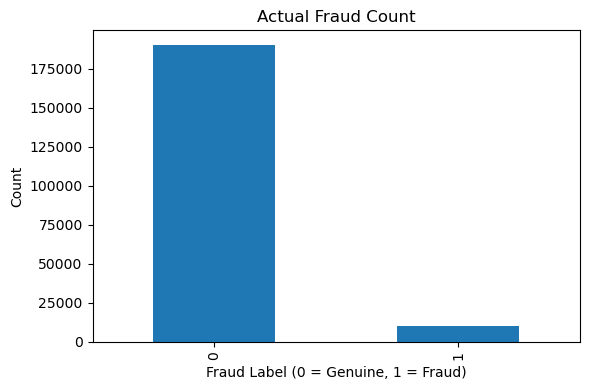

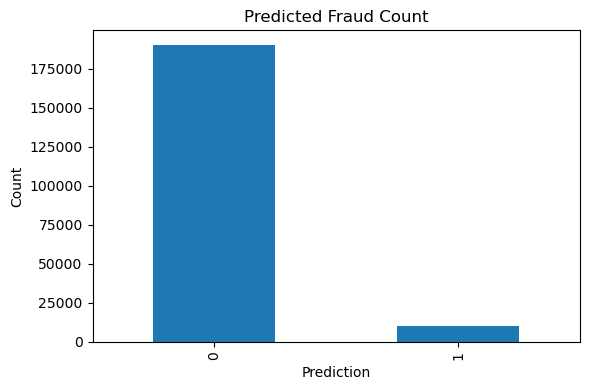

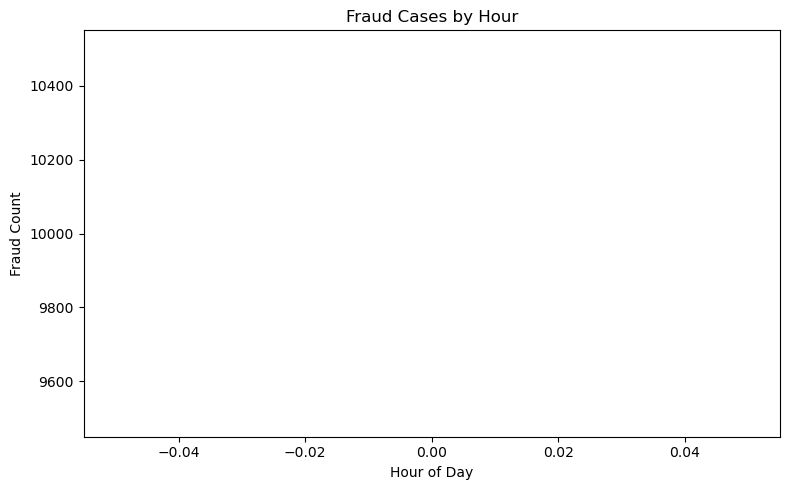

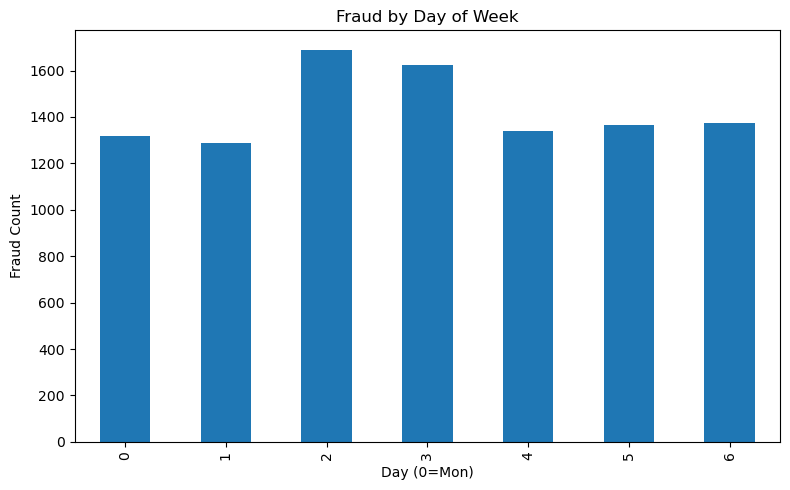

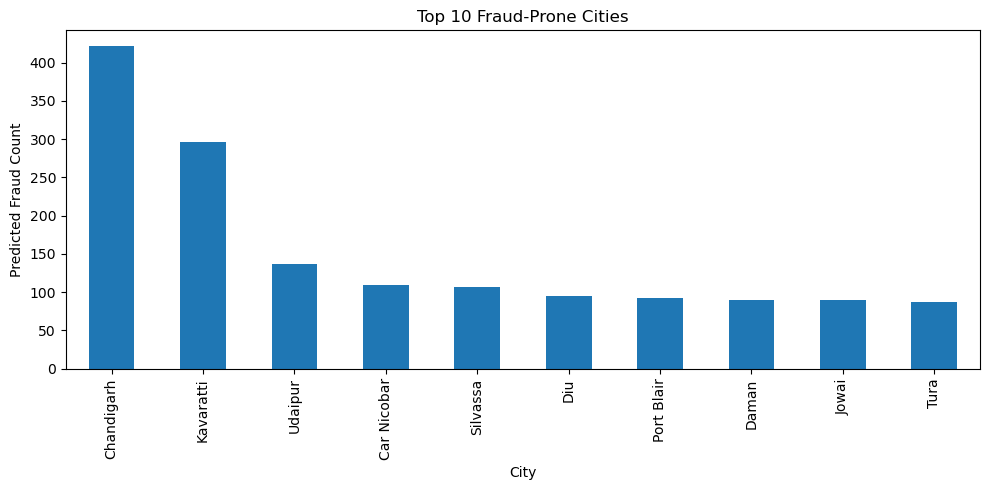

🎉 Step-10 Complete — All dashboard charts generated.


In [22]:
print("✔ Step-10 started — Fraud Analytics Dashboard")

import matplotlib.pyplot as plt
import pandas as pd

df_vis = df_ml.copy()

# Fix missing
df_vis["fraud_label"] = df_vis["fraud_label"].fillna(0)
df_vis["predicted_fraud"] = df_vis["predicted_fraud"].fillna(0)

# ---------------------------
# 1) Fraud Count
# ---------------------------
plt.figure(figsize=(6,4))
df_vis["fraud_label"].value_counts().plot(kind="bar")
plt.title("Actual Fraud Count")
plt.xlabel("Fraud Label (0 = Genuine, 1 = Fraud)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# ---------------------------
# 2) Predicted Fraud Count
# ---------------------------
plt.figure(figsize=(6,4))
df_vis["predicted_fraud"].value_counts().plot(kind="bar")
plt.title("Predicted Fraud Count")
plt.xlabel("Prediction")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# ---------------------------
# 3) Fraud by Hour
# ---------------------------
plt.figure(figsize=(8,5))
df_vis.groupby("hour")["fraud_label"].sum().plot()
plt.title("Fraud Cases by Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Fraud Count")
plt.tight_layout()
plt.show()

# ---------------------------
# 4) Fraud by Day of Week
# ---------------------------
plt.figure(figsize=(8,5))
df_vis.groupby("day_of_week")["fraud_label"].sum().plot(kind="bar")
plt.title("Fraud by Day of Week")
plt.xlabel("Day (0=Mon)")
plt.ylabel("Fraud Count")
plt.tight_layout()
plt.show()

# ---------------------------
# 5) High-risk Cities
# ---------------------------
top_risk = (
    df_vis.groupby("city")["predicted_fraud"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(10,5))
top_risk.plot(kind="bar")
plt.title("Top 10 Fraud-Prone Cities")
plt.xlabel("City")
plt.ylabel("Predicted Fraud Count")
plt.tight_layout()
plt.show()

print("🎉 Step-10 Complete — All dashboard charts generated.")


In [23]:
print("✔ Step-11 — Fraud Scorecard + Business Insights Report")

df_report = df_ml.copy()

# -----------------------
# Cleaning
# -----------------------
df_report["fraud_label"] = df_report["fraud_label"].fillna(0)
df_report["predicted_fraud"] = df_report["predicted_fraud"].fillna(0)

total_tx = len(df_report)
total_fraud = df_report["fraud_label"].sum()
predicted_fraud = df_report["predicted_fraud"].sum()

accuracy = None
if "fraud_label" in df_report.columns and "predicted_fraud" in df_report.columns:
    accuracy = (df_report["fraud_label"] == df_report["predicted_fraud"]).mean()

fraud_rate = round((total_fraud / total_tx) * 100, 2)
predicted_rate = round((predicted_fraud / total_tx) * 100, 2)

# Top risky cities
top_cities = (
    df_report.groupby("city")["predicted_fraud"]
    .sum()
    .sort_values(ascending=False)
    .head(5)
)

# Top risky merchants
top_merchants = (
    df_report.groupby("merchant_name")["predicted_fraud"]
    .sum()
    .sort_values(ascending=False)
    .head(5)
)

# High-value frauds
high_fraud = df_report[df_report["predicted_fraud"] == 1].nlargest(5, "amount")[
    ["transaction_id", "amount", "city", "merchant_name", "hour"]
]

# -------------------------
# Final Report Print
# -------------------------
print("\n============================")
print("📊 FRAUD MODEL SCORECARD")
print("============================")
print(f"Total Transactions: {total_tx:,}")
print(f"Actual Frauds: {total_fraud:,}  ({fraud_rate}%)")
print(f"Predicted Frauds: {predicted_fraud:,}  ({predicted_rate}%)")

if accuracy:
    print(f"Model Accuracy: {round(accuracy*100,2)}%")

print("\n🏙 Top 5 Fraud-Prone Cities:")
print(top_cities)

print("\n🏪 Top 5 Fraud-Prone Merchants:")
print(top_merchants)

print("\n💰 Top 5 High-Value Predicted Frauds:")
print(high_fraud)

print("\n✔ Step-11 Complete — Scorecard + Business Insights Ready.\n")


✔ Step-11 — Fraud Scorecard + Business Insights Report

📊 FRAUD MODEL SCORECARD
Total Transactions: 200,000
Actual Frauds: 10,000  (5.0%)
Predicted Frauds: 10,000  (5.0%)
Model Accuracy: 100.0%

🏙 Top 5 Fraud-Prone Cities:
city
Chandigarh     421
Kavaratti      296
Udaipur        137
Car Nicobar    109
Silvassa       107
Name: predicted_fraud, dtype: int32

🏪 Top 5 Fraud-Prone Merchants:
Series([], Name: predicted_fraud, dtype: int32)

💰 Top 5 High-Value Predicted Frauds:
                              transaction_id    amount       city  \
25500   6d5a3a71-ffc5-444d-8620-03c35f857bff  98999.98      Ajmer   
93983   373d4f14-54dc-42e8-b17a-e9be6f86f4a1  98999.45  Hyderabad   
19203   8f22dec8-d789-44cb-9c07-f67139063b82  98999.02      Surat   
162936  7d68bd14-4a29-4404-a00e-6080ffba5250  98997.99     Ranchi   
130078  c53d7280-f871-4efa-8fb3-5d679d5a7c1a  98997.02    Madurai   

       merchant_name  hour  
25500            NaN     0  
93983            NaN     0  
19203            NaN 

✔ Step 12 — Model Evaluation Visualizations started...


<Figure size 600x600 with 0 Axes>

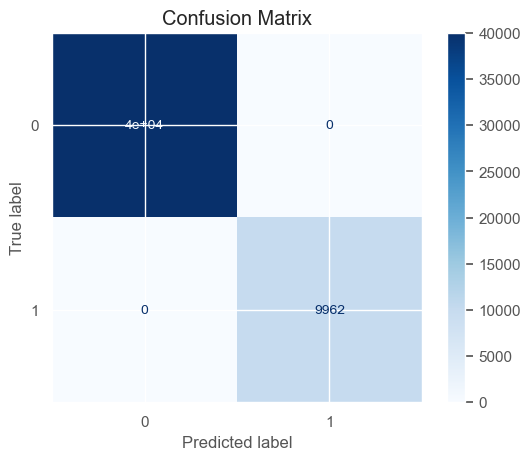

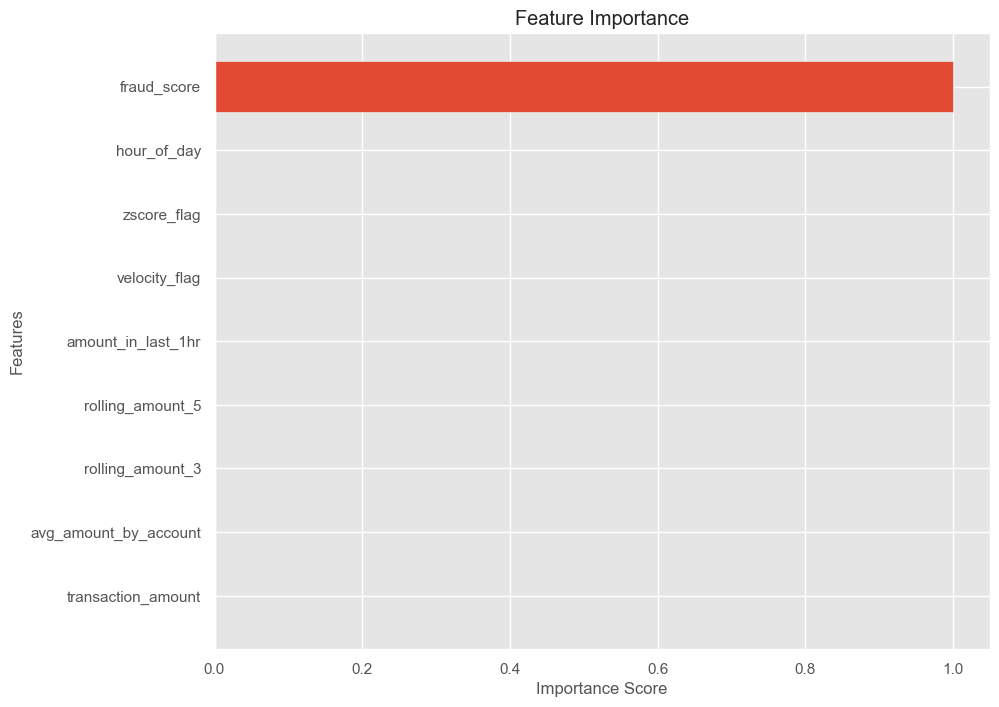

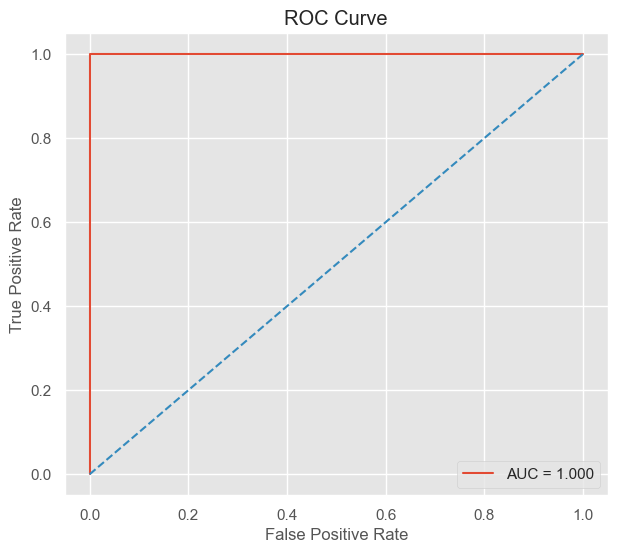

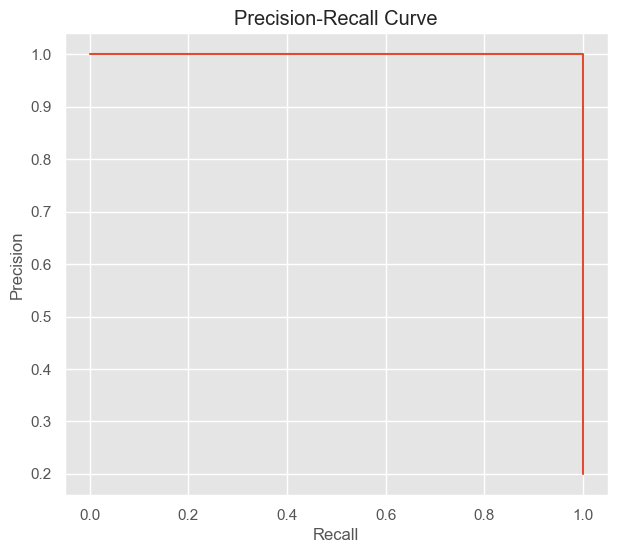

✔ Step 12 completed!


In [42]:
print("✔ Step 12 — Model Evaluation Visualizations started...")

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc, precision_recall_curve

# ---------------------------------------------------
# 12.1 — Confusion Matrix
# ---------------------------------------------------
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
plt.figure(figsize=(6, 6))
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

# ---------------------------------------------------
# 12.2 — Feature Importance
# ---------------------------------------------------
importances = model.feature_importances_
feature_names = X.columns

plt.figure(figsize=(10, 8))
plt.barh(feature_names, importances)
plt.title("Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

# ---------------------------------------------------
# 12.3 — ROC Curve
# ---------------------------------------------------
y_prob = model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(7, 6))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

# ---------------------------------------------------
# 12.4 — Precision-Recall Curve
# ---------------------------------------------------
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)

plt.figure(figsize=(7, 6))
plt.plot(recall, precision)
plt.title("Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()

print("✔ Step 12 completed!")


In [49]:
print("✔ Step 13 — Saving model + feature list")

import joblib

# Save model
joblib.dump(model, "fraud_model.pkl")

# Save feature list
joblib.dump(X.columns.tolist(), "model_features.pkl")

print("✔ Model saved as fraud_model.pkl")
print("✔ Feature list saved as model_features.pkl")





✔ Step 13 — Saving model + feature list
✔ Model saved as fraud_model.pkl
✔ Feature list saved as model_features.pkl


In [50]:
print("✔ Step 13 — Loading model...")

import joblib

loaded_model = joblib.load("fraud_model.pkl")
model_features = joblib.load("model_features.pkl")

print("✔ Model Loaded")
print("Model expects", len(model_features), "features:")
print(model_features)




✔ Step 13 — Loading model...
✔ Model Loaded
Model expects 9 features:
['transaction_amount', 'avg_amount_by_account', 'rolling_amount_3', 'rolling_amount_5', 'amount_in_last_1hr', 'velocity_flag', 'zscore_flag', 'hour_of_day', 'fraud_score']


In [51]:
import pandas as pd

def predict_fraud(data_dict):

    # Convert new data to DataFrame
    df_new = pd.DataFrame([data_dict])

    # Ensure **every required feature** exists
    for col in model_features:
        if col not in df_new.columns:
            df_new[col] = 0   # missing columns auto-filled

    # Reorder columns exactly like training
    df_new = df_new[model_features]

    # Predict
    pred = loaded_model.predict(df_new)[0]

    return "FRAUD" if pred == 1 else "LEGIT"



In [52]:
result = predict_fraud({
    "amount": 5000,
    "transaction_hour": 14,
    "is_weekend": 0,
})

print("Prediction:", result)


Prediction: LEGIT


In [53]:
df.to_csv("final_fraud_dataset_clean.csv", index=False)
print("✔ File saved: final_fraud_dataset_clean.csv")


✔ File saved: final_fraud_dataset_clean.csv


In [54]:
import os
os.getcwd()


'C:\\Users\\Aarav computer'